## Task 2: Noise, Noise, and More Noise

One of the main challenges in quantum computing is the noise in current devices. In this task, you will create a simple noise generator and assess its effect. You can use any framework you like (Qiskit, Cirq, etc..)

## Installing Dependencies

In [ ]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.9 MB/s eta 0:00:00


One of the main challenges in quantum computing is the noise in current devices. In this task, you will create a simple noise generator and assess its effect.

## Noise Model

A standard way to represent the noise in a quantum circuit is through Pauli operators (x, y, z). Build a function with input ,  and QuantumCircuit where:

α → Probability of having a random Pauli operator acting on the qubit after a one-qubit gate
   
β → Probability of having a random Pauli operator acting on the qubit after a two-qubit gate

QuantumCircuit → Quantum circuit where the noise will be added

The output should be the Quantum Circuit with Noise

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import XGate, YGate, ZGate
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

def apply_random_pauli(circuit: QuantumCircuit, qubit) -> QuantumCircuit:
    pauli_operator = np.random.choice([XGate, YGate, ZGate])()
    circuit.append(pauli_operator, [qubit])
    return circuit

def add_pauli_noise(circuit: QuantumCircuit, p1: float, p2: float) -> QuantumCircuit:
    noisy_circuit = QuantumCircuit(*circuit.qregs, *circuit.cregs)

    for instr in circuit.data:
        operation, qargs, cargs = instr.operation, instr.qubits, instr.clbits
        noisy_circuit.append(operation, qargs, cargs)

        if len(qargs) == 1:
            if np.random.rand() < p1:
                noisy_circuit = apply_random_pauli(noisy_circuit, qargs[0])

        elif len(qargs) == 2:
            if np.random.rand() < p2:
                noisy_circuit = apply_random_pauli(noisy_circuit, qargs[0])
                noisy_circuit = apply_random_pauli(noisy_circuit, qargs[1])

    return noisy_circuit

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

noisy_qc = add_pauli_noise(qc, 0.1, 0.1)

print(noisy_qc)

     ┌───┐     ┌───┐┌─┐   
q_0: ┤ H ├──■──┤ Y ├┤M├───
     └───┘┌─┴─┐├───┤└╥┘┌─┐
q_1: ─────┤ X ├┤ Z ├─╫─┤M├
          └───┘└───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 


## Gate Basis

Quantum computers can implement only a set of gates that, with transformations, can represent any other possible gate. This set of gates is called the Gate Basis of the QPU. Build a function that transforms a general Quantum Circuit to the following gate basis: {CX,ID,RZ,SX,X}

In [ ]:
from qiskit import QuantumCircuit, transpile

def transform_to_gate_basis(circuit: QuantumCircuit) -> QuantumCircuit:
    target_basis = ['cx', 'id', 'rz', 'sx', 'x']
    transpiled_circuit = transpile(circuit, basis_gates=target_basis)
    return transpiled_circuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.ry(0.5, 0)
qc.t(1)
qc.measure_all()

transformed_qc= transform_to_gate_basis(qc)
print(transformed_qc)

global phase: 3π/8
        ┌─────────┐┌────┐┌─────────┐      ┌────────┐┌────┐┌────────────┐┌────┐»
   q_0: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───┤ Rz(-π) ├┤ √X ├┤ Rz(2.6416) ├┤ √X ├»
        └─────────┘└────┘└─────────┘┌─┴─┐┌┴────────┤└────┘└────────────┘└────┘»
   q_1: ────────────────────────────┤ X ├┤ Rz(π/4) ├──────────────────────────»
                                    └───┘└─────────┘                          »
meas: 2/══════════════════════════════════════════════════════════════════════»
                                                                              »
«         ░ ┌─┐   
«   q_0: ─░─┤M├───
«         ░ └╥┘┌─┐
«   q_1: ─░──╫─┤M├
«         ░  ║ └╥┘
«meas: 2/════╩══╩═
«            0  1 


In [ ]:
!pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.6 MB/s eta 0:00:00


## Adding two numbers with a quantum computer

Build a function (quantum_sum) to add two numbers using the Draper adder algorithm. You will need the Quantum Fourier Transform (QFT). Many libraries offer a function to use it. For this task, you will need to build QFT from scratch.

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

def apply_controlled_phase(circuit, control, target, k):
    circuit.cp(np.pi / (2 ** k), control, target)

def qft(circuit, n):
    for i in range(n):
        circuit.h(i)
        for j in range(i+1, n):
            apply_controlled_phase(circuit, j, i, j - i + 1)

    for i in range(n // 2):
        circuit.swap(i, n - i - 1)
    return circuit

def iqft(circuit, n):
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)

    for i in reversed(range(n)):
        for j in reversed(range(i+1, n)):
            apply_controlled_phase(circuit, j, i, -(j - i + 1))
        circuit.h(i)

    return circuit

def initialize_number(circuit, number, n) -> QuantumCircuit:
    for i in range(n):
        if (number >> i) & 1:
            circuit.x(i)

def quantum_sum(a, b, n):
    circuit = QuantumCircuit(2 * n, n)
    initialize_number(circuit, a, n)
    qft(circuit, n)

    for i in range(n):
        for j in range(i + 1):
            circuit.cp((np.pi / (2 ** (i - j + 1))) * ((b >> j) & 1), n + j, i)

    iqft(circuit, n)
    circuit.measure(range(n), range(n))
    return circuit

def run_quantum_circuit(a, b, n, shots=1000):
    qc = quantum_sum(a, b, n)
    simulator = AerSimulator()
    result = simulator.run(qc, shots=shots).result()
    counts = result.get_counts()
    return counts

a = 1
b = 2
n = 2
result = quantum_sum(a, b, n)
result2 = run_quantum_circuit(a, b, n)
print(f"Quantum addition result: {a} + {b} = {result2}")

Quantum addition result: 1 + 2 = {'01': 1000}


## Effects of noise on quantum addition

Now, we can combine all the functions. Transform the circuit used in the quantum_sum to the gate basis and add noise. Use different levels of noise and analyze the results.

### How does the noise affect the results?

 As we increase the noise level, we can observe that the probability of getting the correct result (3 in binary, '11') decreases. This is because noise introduces errors in the quantum states and operations, leading to incorrect measurements.

### Is there a way to decrease the effect of noise?

- Error correction codes: Implementing quantum error correction codes can help mitigate the effects of noise.

- Circuit optimization: Reducing the number of gates and the circuit depth can minimize the accumulation of errors.

- Dynamic decoupling: Applying additional pulses to counteract the effects of noise.

- Noise-aware compilation: Optimizing the circuit layout based on the noise characteristics of the specific quantum hardware.

### How does the number of gates used affect the results?

The number of gates in the circuit directly impacts the vulnerability to noise.

More gates mean:
- Longer execution time, allowing more opportunities for decoherence.

- More points where errors can be introduced.

- Accumulation of errors throughout the circuit.

Analyzing quantum addition: 1 + 2
Noise level: 0.000, Probability of correct result: 0.000
Noise level: 0.010, Probability of correct result: 0.000
Noise level: 0.050, Probability of correct result: 0.000
Noise level: 0.100, Probability of correct result: 0.000
Noise level: 0.200, Probability of correct result: 0.513

Number of gates in the transformed circuit: 30


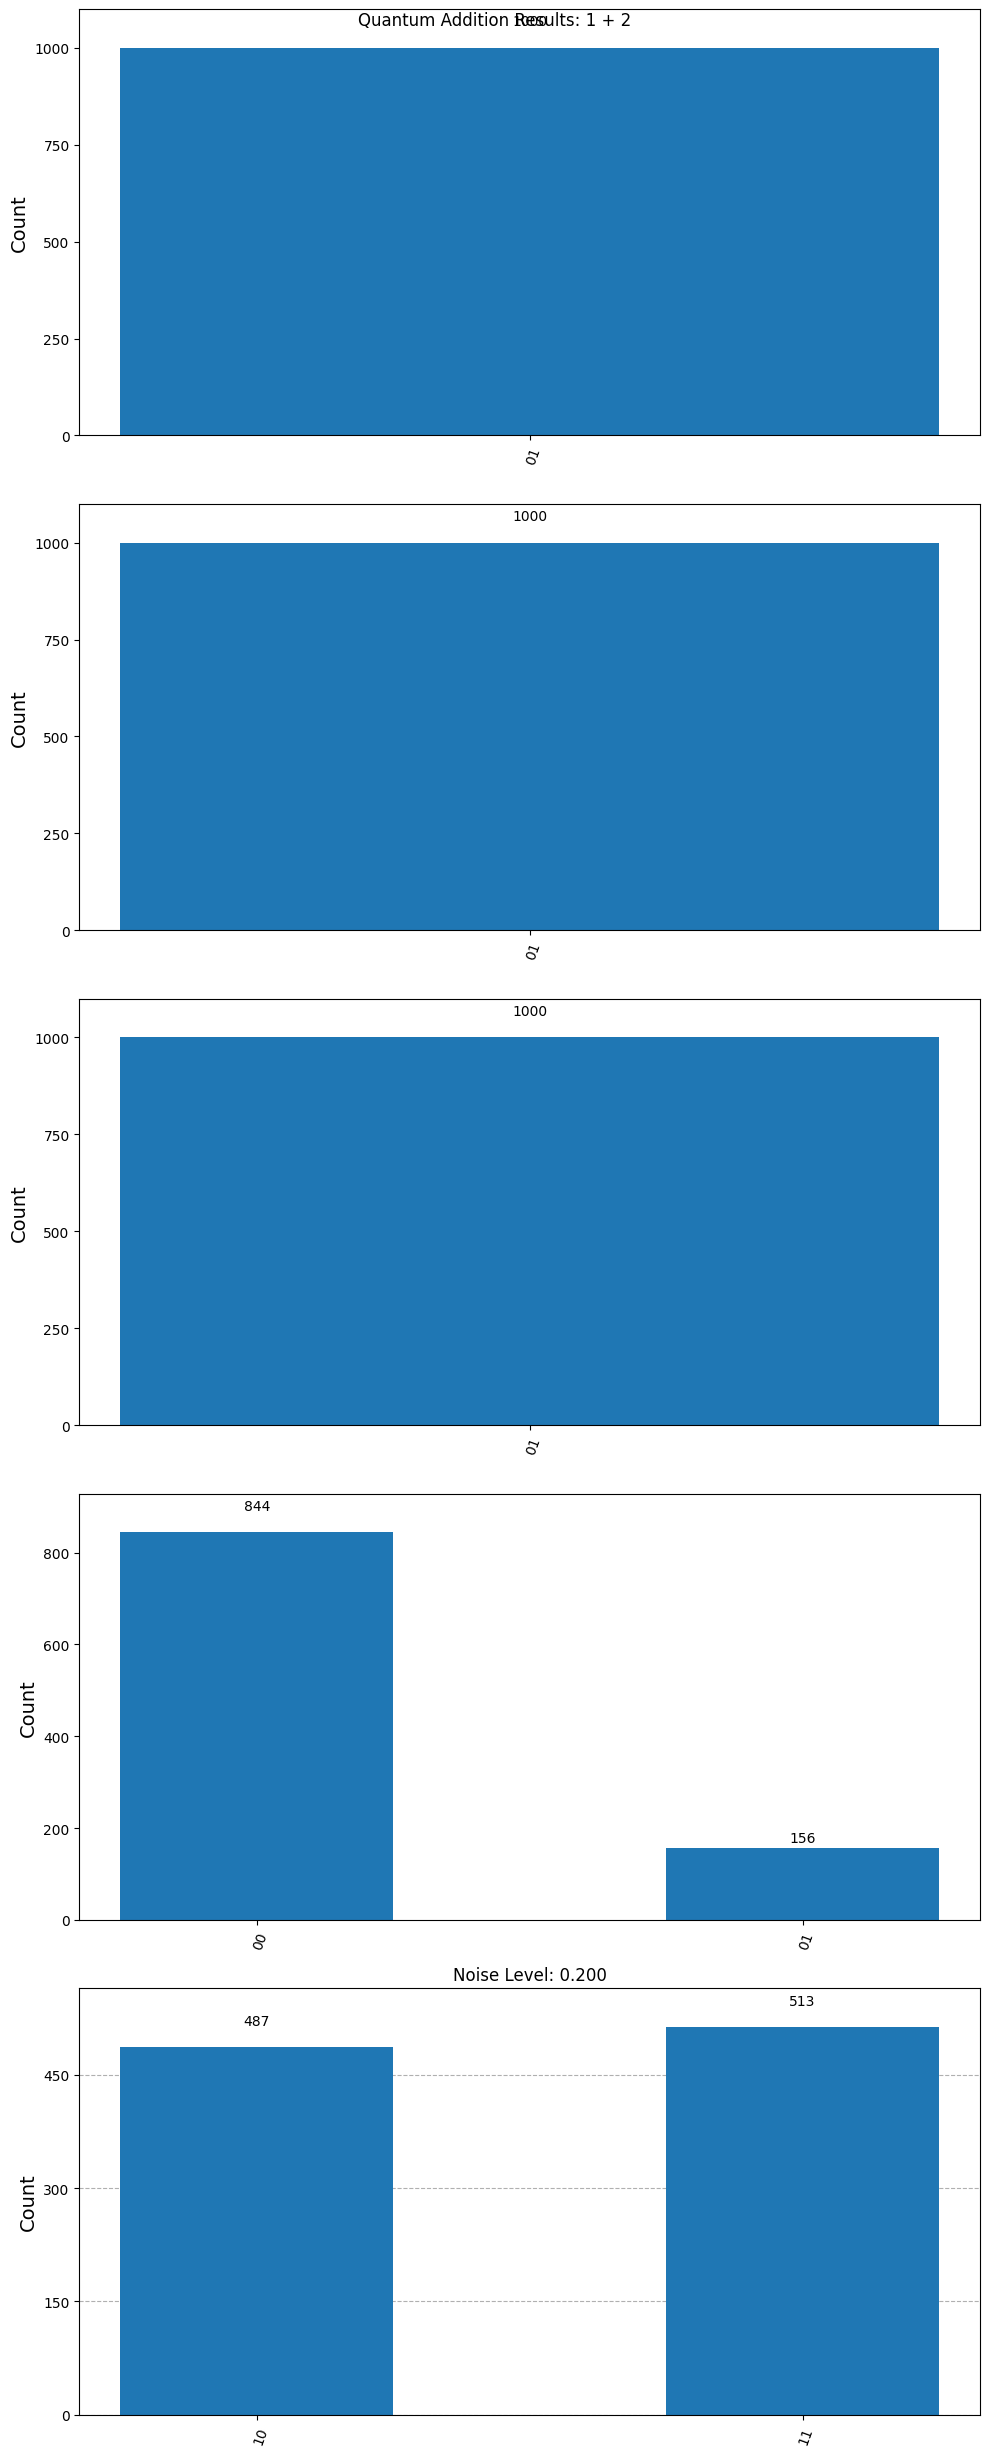

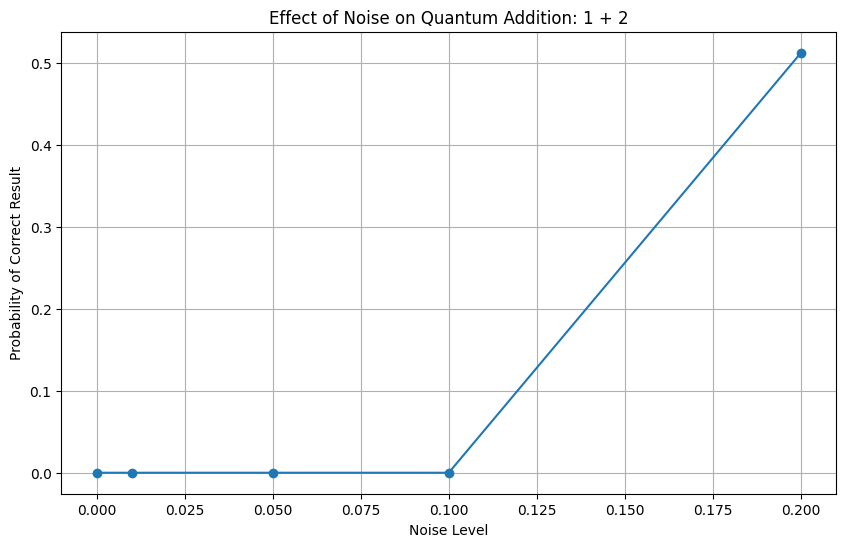


Summary:
Circuit depth (number of gates): 30
Noise level vs. Probability of correct result:
  0.000: 0.000
  0.010: 0.000
  0.050: 0.000
  0.100: 0.000
  0.200: 0.513


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import XGate, YGate, ZGate
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

def apply_controlled_phase(circuit, control, target, k):
    circuit.cp(np.pi / (2 ** k), control, target)

def qft(circuit, n):
    for i in range(n):
        circuit.h(i)
        for j in range(i+1, n):
            apply_controlled_phase(circuit, j, i, j - i + 1)
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)
    return circuit

def iqft(circuit, n):
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)
    for i in reversed(range(n)):
        for j in reversed(range(i+1, n)):
            apply_controlled_phase(circuit, j, i, -(j - i + 1))
        circuit.h(i)
    return circuit

def initialize_number(circuit, number, n):
    for i in range(n):
        if (number >> i) & 1:
            circuit.x(i)

def quantum_sum(a, b, n):
    circuit = QuantumCircuit(2 * n, n)
    initialize_number(circuit, a, n)
    qft(circuit, n)
    for i in range(n):
        for j in range(i + 1):
            circuit.cp((np.pi / (2 ** (i - j + 1))) * ((b >> j) & 1), n + j, i)
    iqft(circuit, n)
    circuit.measure(range(n), range(n))
    return circuit

def transform_to_gate_basis(circuit: QuantumCircuit) -> QuantumCircuit:
    target_basis = ['cx', 'id', 'rz', 'sx', 'x']
    transpiled_circuit = transpile(circuit, basis_gates=target_basis)
    return transpiled_circuit

def apply_random_pauli(circuit: QuantumCircuit, qubit) -> QuantumCircuit:
    pauli_operator = np.random.choice([XGate, YGate, ZGate])()
    circuit.append(pauli_operator, [qubit])
    return circuit

def add_pauli_noise(circuit: QuantumCircuit, p1: float, p2: float) -> QuantumCircuit:
    noisy_circuit = QuantumCircuit(*circuit.qregs, *circuit.cregs)
    for instr in circuit.data:
        operation, qargs, cargs = instr.operation, instr.qubits, instr.clbits
        noisy_circuit.append(operation, qargs, cargs)
        if len(qargs) == 1:
            if np.random.rand() < p1:
                noisy_circuit = apply_random_pauli(noisy_circuit, qargs[0])
        elif len(qargs) == 2:
            if np.random.rand() < p2:
                noisy_circuit = apply_random_pauli(noisy_circuit, qargs[0])
                noisy_circuit = apply_random_pauli(noisy_circuit, qargs[1])
    return noisy_circuit

def run_noisy_quantum_addition(a, b, n, noise_level, shots=1000):
    qc = quantum_sum(a, b, n)
    qc_transformed = transform_to_gate_basis(qc)

    noisy_qc = add_pauli_noise(qc_transformed, noise_level, noise_level)

    simulator = AerSimulator()
    result = simulator.run(noisy_qc, shots=shots).result()
    counts = result.get_counts()

    return counts

def analyze_noise_effect(a, b, n, noise_levels, shots=1000):
    correct_sum = a + b
    results = {}
    correct_probs = []

    for noise in noise_levels:
        counts = run_noisy_quantum_addition(a, b, n, noise, shots)
        results[noise] = counts

        correct_prob = counts.get(format(correct_sum, f'0{n}b'), 0) / shots
        correct_probs.append(correct_prob)
        print(f"Noise level: {noise:.3f}, Probability of correct result: {correct_prob:.3f}")

    return results, correct_probs

a, b = 1, 2
n = 2
noise_levels = [0.0, 0.01, 0.05, 0.1, 0.2]

print(f"Analyzing quantum addition: {a} + {b}")
results, correct_probs = analyze_noise_effect(a, b, n, noise_levels)

qc = quantum_sum(a, b, n)
qc_transformed = transform_to_gate_basis(qc)
print(f"\nNumber of gates in the transformed circuit: {len(qc_transformed)}")

fig, axs = plt.subplots(len(noise_levels), 1, figsize=(10, 5*len(noise_levels)))
fig.suptitle(f"Quantum Addition Results: {a} + {b}")

for i, (noise, counts) in enumerate(results.items()):
    plot_histogram(counts, ax=axs[i], title=f"Noise Level: {noise:.3f}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(noise_levels, correct_probs, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Probability of Correct Result')
plt.title(f'Effect of Noise on Quantum Addition: {a} + {b}')
plt.grid(True)
plt.show()

print("\nSummary:")
print(f"Circuit depth (number of gates): {len(qc_transformed)}")
print("Noise level vs. Probability of correct result:")
for noise, prob in zip(noise_levels, correct_probs):
    print(f"  {noise:.3f}: {prob:.3f}")